In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-dataset/sentiment_analysis.csv


# Problem statement
# sentiment analysis of tweets, classify the tweets as postitive sentiments '0 'and negative sentiment '1'

In [2]:
df=pd.read_csv("/kaggle/input/sentiment-analysis-dataset/sentiment_analysis.csv")

In [3]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [5]:
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

In [6]:
# change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [77]:
import warnings
warnings.filterwarnings('ignore')

Data preparation and preprocessing

In [9]:
df.shape

(7920, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [15]:
df['tweet'].nunique()#duplicate records

7918

In [16]:
df_no_duplicates = df.drop_duplicates(subset=['tweet'])


In [17]:
df_no_duplicates.shape

(7918, 3)

## data cleaning 

In [18]:
# Write your function here to clean the text and remove all the unnecessary elements.
def cleaning_data(text):
    text=text.lower()
    text=re.sub(r'\[.*?\]', '', text).strip() #Remove text in square brackets
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = re.sub(r'\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [19]:
#Write your function to Lemmatize the texts
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [27]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = pd.DataFrame()

In [29]:
df_clean['tweet']= df_no_duplicates['tweet'].apply(lambda x: cleaning_data(x))

In [32]:
df_clean['label']=df_no_duplicates['label']

In [33]:
df_clean.head()

,tweet,label
0,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,0
1,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias…,0
2,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,0
3,im wired i know im george i was made that way iphone cute daventry home,0
4,what amazing service apple wont even talk to me about a question i have unless i pay them for their stupid support,1


In [34]:
# lemmitize the text columns
df_clean['tweet_lemma'] =  df_clean.tweet.apply(lambda x: lemmatizer(x))
df_clean.head()

,tweet,label,tweet_lemma
0,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,0,fingerprint pregnancy test android app beautiful cute health iger iphoneonly iphonesia iphone
1,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias…,0,finally transparant silicon case thank uncle yay sony xperia s sonyexperias …
2,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,0,love talk makememorie unplug relax iphone smartphone wifi connect
3,im wired i know im george i was made that way iphone cute daventry home,0,m wire know m george way iphone cute daventry home
4,what amazing service apple wont even talk to me about a question i have unless i pay them for their stupid support,1,amazing service apple will not talk question pay stupid support


# Performing EDA

### Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'tweet' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   3.,   8.,
         28.,  49.,  75.,  96., 187., 177., 200., 289., 440., 334., 421.,
        460., 559., 433., 400., 411., 293., 362., 280., 362., 240., 260.,
        260., 268., 157., 105.,  69.,  33.,  37.,  10.,  18.,  20.,  13.,
         27.,  16.,  25.,  11.,  11.,  13.,  19.,  10.,  21.,  15.,  18.,
         19.,  13.,  18.,  16.,  27.,  17.,  26.,  24.,  18.,  20.,  26.,
         21.,  11.,  15.,  22.,  14.,  11.,   6.,  14.,   4.,   2.,   4.,
          3.,   5.,   4.,   7.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  5.  ,   8.26,  11.52,  14.78,  18.04,  21.3 ,  24.56,  27.82,
         31.08,  34.34,  37.6 ,  40.86,  44.12,  47.38,  50.64,  53.9 ,
         57.16,  60.42,  63.68,  66.94,  70.2 ,  73.46,  76.72,  79.98,
         83.24,  86.5 ,  89.76,  93.02,  96.28,  99.54, 102.8 , 106.06,
        109.32, 112.58, 115.84

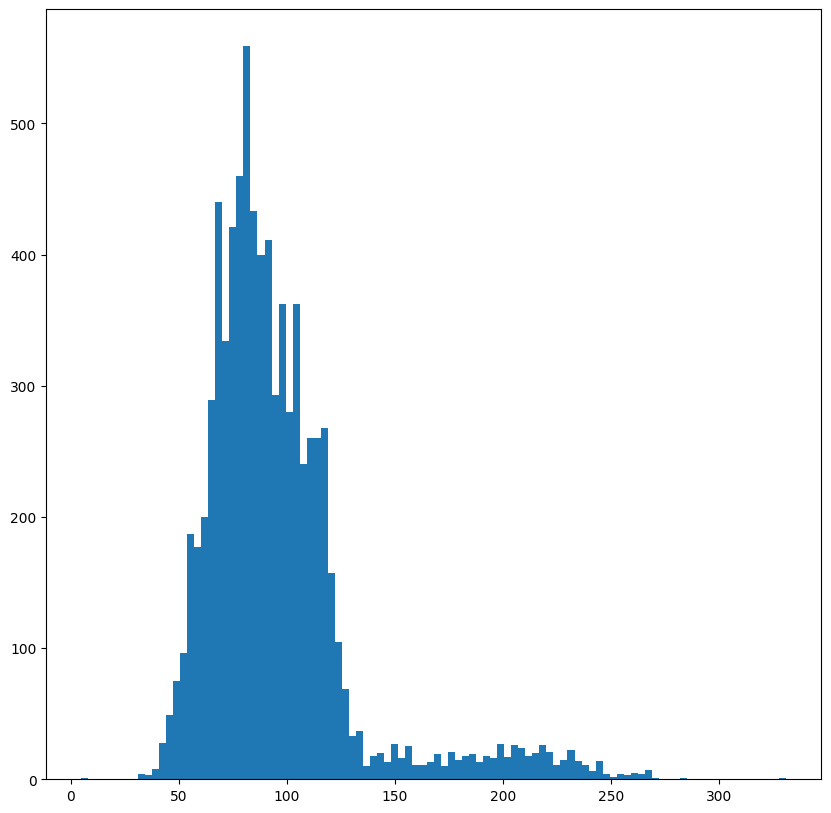

In [36]:
#Vizulalize tweet what happned
plt.figure(figsize=(10,10))
doc_length = [len(d) for d in df_clean.tweet]
plt.hist(doc_length, bins = 100)

#### Find the top 40 words by frequency among all the articles after processing the text.

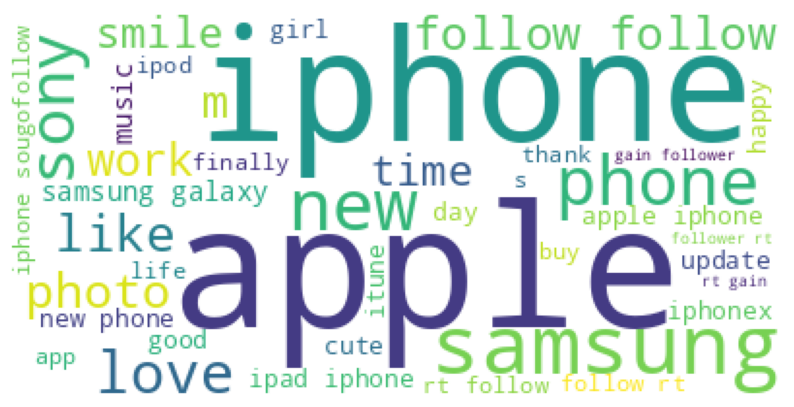

In [37]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=stopwords,background_color='white',max_words=40).generate(str(df_clean.tweet_lemma))

print(wordcloud)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [41]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_U_B_Tgram(text, ngram=1, top=None):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]
top_30_unigrams = get_top_n_U_B_Tgram(df_clean.tweet_lemma,ngram=1, top=30)

In [42]:
#Print the top 10 words in the unigram frequency
print('Top 10 unigrams:\n')
top_30_unigrams[:10]

Top 10 unigrams:



[('iphone', 3799),
 ('apple', 2891),
 ('samsung', 1411),
 ('new', 1153),
 ('phone', 1022),
 ('sony', 849),
 ('follow', 728),
 ('rt', 527),
 ('ipad', 525),
 ('love', 482)]

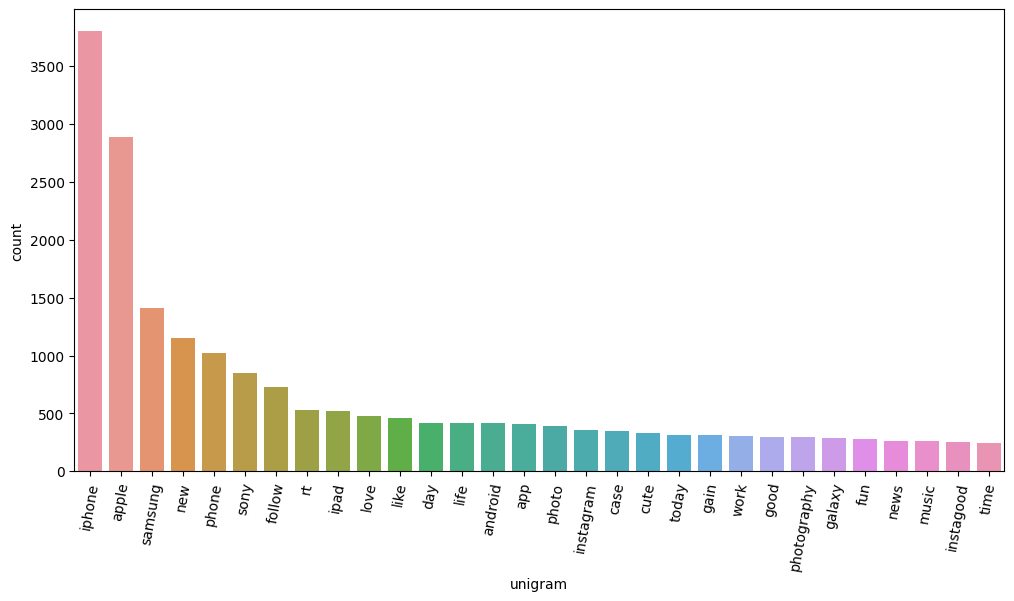

In [43]:
#Plot graph for the top 30 words in the unigram frequency
df1 = pd.DataFrame(top_30_unigrams, columns = ['unigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df1['unigram'], y=df1['count'])
plt.xticks(rotation = 80)
plt.show()

In [46]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
top_30_bigrams = get_top_n_U_B_Tgram(df_clean.tweet_lemma,ngram=2, top=30)

In [48]:
print('Top 30 bigrams:\n')
top_30_bigrams[:30]

Top 30 bigrams:



[('follow follow', 297),
 ('samsung galaxy', 222),
 ('new phone', 215),
 ('apple iphone', 208),
 ('ipad iphone', 184),
 ('iphone sougofollow', 165),
 ('follow rt', 161),
 ('rt follow', 148),
 ('gain follower', 147),
 ('follower rt', 147),
 ('rt gain', 147),
 ('gain iphone', 142),
 ('iphone apple', 136),
 ('iphone case', 112),
 ('iphone ipad', 112),
 ('iphone funny', 106),
 ('news photography', 102),
 ('photography fashion', 101),
 ('fashion health', 101),
 ('health fail', 101),
 ('fail tech', 101),
 ('tech ipad', 101),
 ('funny lol', 95),
 ('new iphone', 92),
 ('today iphone', 76),
 ('samsung iphone', 72),
 ('iphone accessory', 65),
 ('like wish', 62),
 ('wish amazing', 62),
 ('amazing day', 62)]

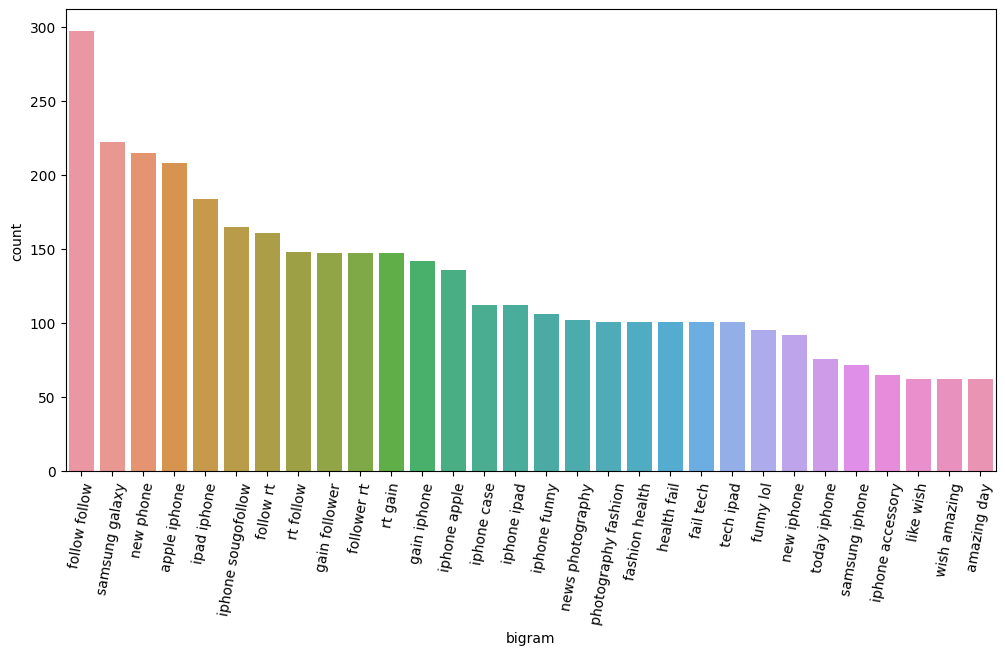

In [49]:
#Plot graph for the top 30 words in the bigram frequency
df2 = pd.DataFrame(top_30_bigrams, columns = ['bigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df2['bigram'], y=df2['count'])
plt.xticks(rotation = 80)
plt.show()

In [51]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
top_30_trigrams = get_top_n_U_B_Tgram(df_clean.tweet_lemma,ngram=3, top=30)
#Print the top 10 words in the trigram frequency
print('Top 10 trigrams:\n')
top_30_trigrams[:10]

Top 10 trigrams:



[('gain follower rt', 147),
 ('follower rt follow', 147),
 ('rt follow follow', 147),
 ('follow follow follow', 147),
 ('follow follow rt', 147),
 ('follow rt gain', 147),
 ('rt gain iphone', 142),
 ('gain iphone sougofollow', 142),
 ('news photography fashion', 101),
 ('photography fashion health', 101)]

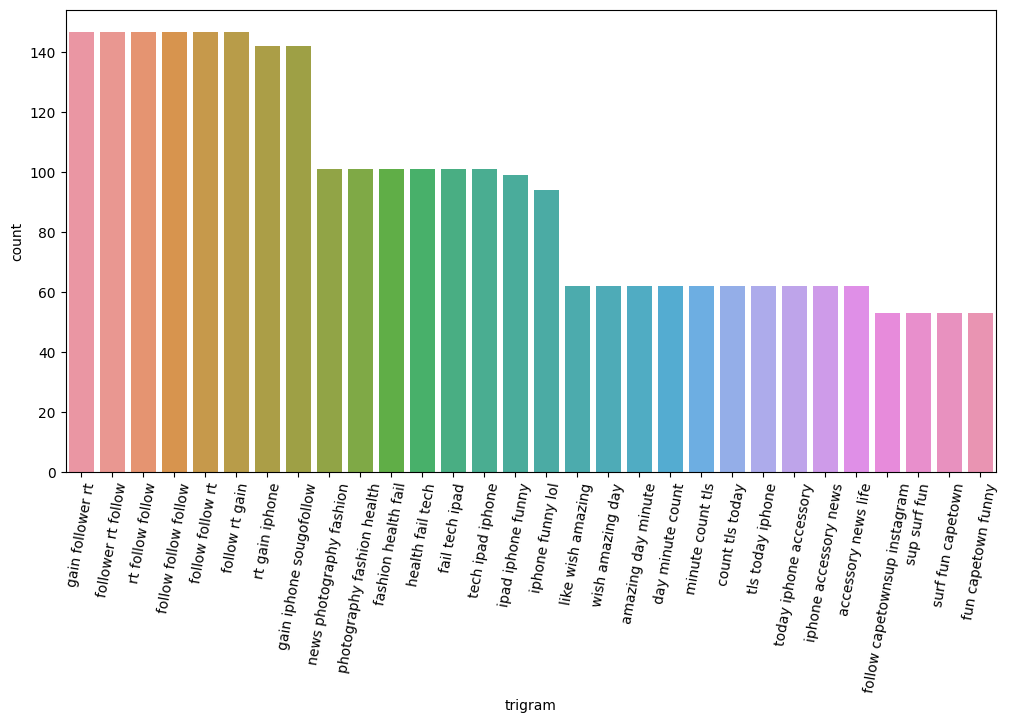

In [53]:
#Plot graph for the top 30 words in the trigram frequency
df3 = pd.DataFrame(top_30_trigrams, columns = ['trigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df3['trigram'], y=df3['count'])
plt.xticks(rotation = 80)
plt.show()

In [55]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data=df_clean[['tweet_lemma','label']]

In [58]:
training_data.head()

,tweet_lemma,label
0,fingerprint pregnancy test android app beautiful cute health iger iphoneonly iphonesia iphone,0
1,finally transparant silicon case thank uncle yay sony xperia s sonyexperias …,0
2,love talk makememorie unplug relax iphone smartphone wifi connect,0
3,m wire know m george way iphone cute daventry home,0
4,amazing service apple will not talk question pay stupid support,1


####  Apply the supervised models on the training data created. In this process, you have to do the following:

Create the vector counts using Count Vectoriser
Transform the word vecotr to tf-idf


In [59]:
from sklearn.feature_extraction.text import TfidfTransformer

In [60]:
#Write your code to get the Vector count
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.tweet_lemma)

#Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [62]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [63]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.label, test_size=0.2, random_state=42)

In [64]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((6334, 15376), (1584, 15376), (6334,), (1584,))

## Model Building

**1. Logistic Regression**

In [67]:
# Logistic Regression
lr = LogisticRegression(random_state=42)

In [79]:
param= {
    'C': [0.01, 0.1,1, 2, 5, 10],
    'penalty': ['l1', 'l2','none'],
    'max_iter': [1000,2000]
}

In [80]:
grid_search = GridSearchCV(estimator=lr, param_grid=param,
                           cv=5, n_jobs=-1,scoring='accuracy')


In [81]:
grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 2, 5, 10],
                         'max_iter': [1000, 2000],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='accuracy')

In [82]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'C': 5, 'max_iter': 1000, 'penalty': 'l2'}
Best Score: 0.8680144037924666


In [83]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [84]:
print(f"Test set accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Test set accuracy: 0.8825757575757576
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1182
           1       0.83      0.68      0.75       402

    accuracy                           0.88      1584
   macro avg       0.86      0.82      0.84      1584
weighted avg       0.88      0.88      0.88      1584



In [86]:
Accuracy_logistic=accuracy_score(y_test, y_pred)
Accuracy_logistic

0.8825757575757576

#### Random Forest

In [89]:
RF = RandomForestClassifier(random_state=42)

In [101]:
param_RF= {
    'n_estimators': [10,20, 30,40],  # Number of trees in the forest
    'max_depth': [10, 20, 30,50],  # Maximum number of levels in tree
    'min_samples_split': [5, 15,20],  # Minimum number of samples required to split a node
    'min_samples_leaf': [3,5, 15,20],  # Minimum number of samples required at each leaf node
}

In [102]:
grid_search_R= GridSearchCV(estimator=RF, param_grid=param_RF, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [103]:
# Fit the model using GridSearchCV
grid_search_R.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 50],
                         'min_samples_leaf': [3, 5, 15, 20],
                         'min_samples_split': [5, 15, 20],
                         'n_estimators': [10, 20, 30, 40]},
             scoring='accuracy', verbose=1)

In [105]:
best_model_R = grid_search_R.best_estimator_
y_pred_R = best_model_R.predict(X_test)

In [106]:
# Get the best parameters and best score
best_params_R = grid_search_R.best_params_
best_score_R = grid_search_R.best_score_
print("Best Parameters:", best_params_R)
print("Best Score:", best_score_R)

Best Parameters: {'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 20, 'n_estimators': 30}
Best Score: 0.8253858114165515


In [107]:
print(f"Test set accuracy: {accuracy_score(y_test, y_pred_R)}")
print(classification_report(y_test, y_pred_R))

Test set accuracy: 0.8276515151515151
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1182
           1       0.91      0.36      0.51       402

    accuracy                           0.83      1584
   macro avg       0.86      0.67      0.70      1584
weighted avg       0.84      0.83      0.80      1584



In [108]:
print(f"Test set accuracy: {accuracy_score(y_test, y_pred_R)}")
print(classification_report(y_test, y_pred_R))

Test set accuracy: 0.8276515151515151
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1182
           1       0.91      0.36      0.51       402

    accuracy                           0.83      1584
   macro avg       0.86      0.67      0.70      1584
weighted avg       0.84      0.83      0.80      1584



### Naive Bayes 


In [113]:
mnb = MultinomialNB()

In [114]:
param_mnb = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0], 'fit_prior': [True, False]}

In [115]:
grid_search_mnb = GridSearchCV(estimator=mnb, param_grid=param_mnb, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [116]:
grid_search_mnb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
                         'fit_prior': [True, False]},
             scoring='accuracy', verbose=1)

In [117]:
best_model_mnb = grid_search_mnb.best_estimator_
y_pred_mnb= best_model_mnb.predict(X_test)

In [118]:
# Get the best parameters and best score
best_params_mnb = grid_search_mnb.best_params_
best_score_mnb = grid_search_mnb.best_score_
print("Best Parameters:", best_params_mnb)
print("Best Score:", best_score_mnb)

Best Parameters: {'alpha': 5.0, 'fit_prior': False}
Best Score: 0.8719629780638918


In [119]:
print(f"Test set accuracy: {accuracy_score(y_test, y_pred_mnb)}")
print(classification_report(y_test, y_pred_mnb))

Test set accuracy: 0.8674242424242424
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1182
           1       0.78      0.67      0.72       402

    accuracy                           0.87      1584
   macro avg       0.84      0.80      0.82      1584
weighted avg       0.86      0.87      0.86      1584



# Conclusion


### LOGISTIC REGRESSION Model gives best test acuuracy , so using logistic model for inference on some random tweets.

## Model Inference	

In [140]:
def predict_Model(text):
    X_new_counts = count_vect.transform(text)
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)
    predicted = best_model.predict(X_new_tfidf)
    return predicted[0]

In [141]:
df_tweet = pd.DataFrame({'tweet': ["Grateful for another beautiful day! 🌞 Remember to spread kindness and positivity wherever you go. Let's make today amazing! 💛 #GoodVibes #PositiveEnergy",
                                    "Feeling so inspired today! 🌟 Let's chase our dreams and lift each other up. Together, we can achieve anything! 💪✨ #Inspiration #Motivation" ,
                                    "Disappointed and frustrated. worst support by lenovo"]})

In [142]:
df_tweet['topic_pred'] = df_tweet['tweet'].apply(lambda x: predict_Model([x]))
df_tweet

,tweet,topic_pred
0,Grateful for another beautiful day! 🌞 Remember to spread kindness and positivity wherever you go. Let's make today amazing! 💛 #GoodVibes #PositiveEnergy,0
1,"Feeling so inspired today! 🌟 Let's chase our dreams and lift each other up. Together, we can achieve anything! 💪✨ #Inspiration #Motivation",0
2,Disappointed and frustrated. worst support by lenovo,1


## prediction was done on some random tweets and the model was able to give correct prediction.
-Note 0 means positive sentiment and 1 means negative sentiment